<a href="https://colab.research.google.com/github/Aragnzlz/SIMULACION-II/blob/main/METROPOLIS_HASTINGS_2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [302]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
import scipy.stats as st
from itertools import accumulate
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D
import math

## NORMAL BIVARIADA

La función de densidad conjunta de la distribución normal bivariada esta dada por:

$$f(x,y)= \frac{1}{2\pi\sigma_x\sigma_y\sqrt{1-\rho^2}}exp(-\frac{1}{2(1-\rho^2)} [ \frac{(x-\mu_x)^2}{\sigma^2_x}+\frac{(y-\mu_y)^2}{\sigma^2_y}-\frac{2\rho(x-\mu_x)(y-\mu_y)}{\sigma_x\sigma_y}]) $$

con:
* $\mu_x$ y $\mu_y$: medias de las variables $X$ y $Y$
* $\sigma^2_x$ y $\sigma^2_y$: varianzas de $X$ y $Y$
* $\rho$: coeficiente de correlación que mide la relación lineal entre $X$ y $Y$

In [303]:
def bivariate_normal(X, Y, sigmax=1.0, sigmay=1.0,
                 mux=0.0, muy=0.0, sigmaxy=0.0):
    """
    Bivariate Gaussian distribution for equal shape *X*, *Y*.
    See `bivariate normal
    <http://mathworld.wolfram.com/BivariateNormalDistribution.html>`_
    at mathworld.
    """
    Xmu = X-mux
    Ymu = Y-muy

    rho = sigmaxy/(sigmax*sigmay)
    z = Xmu**2/sigmax**2 + Ymu**2/sigmay**2 - 2*rho*Xmu*Ymu/(sigmax*sigmay)
    denom = 2*np.pi*sigmax*sigmay*np.sqrt(1-rho**2)
    return np.exp(-z/(2*(1-rho**2))) / denom

def plot_dist(x,y):
    ''' plotting environment we frequently use to visualise the
    sampling algorithms.'''

    sns.set_style('white')
    plt.rcdefaults()

    # plot contour
    g = sns.JointGrid(x=x, y=y, height=10).plot_joint(sns.kdeplot, n_levels=4, cmap="BuPu", shade=True, shade_lowest=False)

    # add scatter plot of data
    g = g.plot_joint(plt.scatter, c="r", s=30, linewidth=1)
    plt.plot(x, y, linestyle='-', marker='', alpha=0.4, )

    # set axis labels
    g.set_axis_labels("$X$", "$Y$")

def traceplot(x):
    '''traceplot in the x-dimension with the cumulative mean (r)
    and the actual mean (--)'''
    sns.tsplot(x)
    l = list(accumulate(x))
    nl = [v/i for i, v in enumerate(l,1)]
    plt.plot(nl, 'r')
    plt.axhline(y=0.0, color='k', linestyle='--')
    plt.ylabel('x')
    plt.xlabel('Iteration')

def autocorrelation_plot(x, l):
    '''plots the autocorrelation of x to lag = l'''
    plt.acorr(x - np.mean(x), maxlags=l,  normed=True, usevlines=False);
    plt.xlim((0, 100))
    plt.ylabel('Autocorrelation')
    plt.xlabel('Lag')


In [304]:
# set mean and covariance for Q
mean = np.array([0, 1])
var = np.array([[1, .5], [.5, 1]])

Text(0.5, 0, '$\\pi(x,y)$')

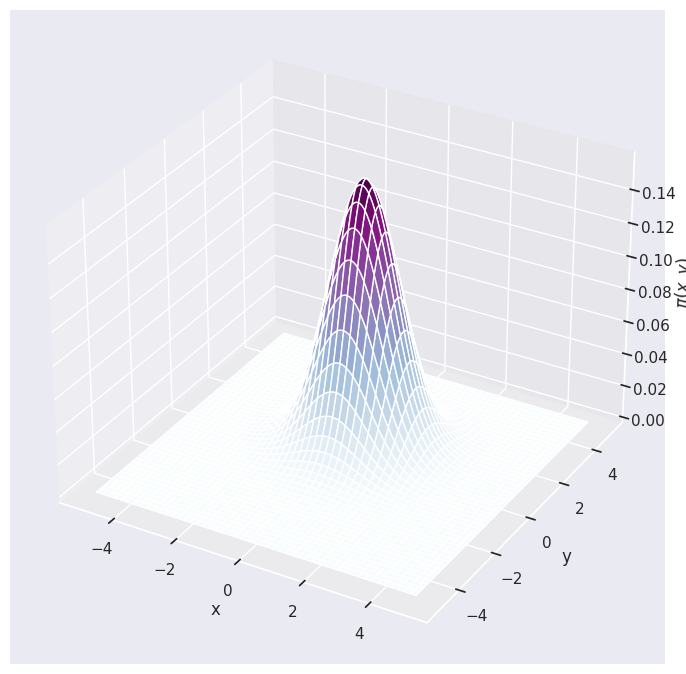

In [305]:
# create grid for 3D plot
x, y = np.linspace(-5, 5, 200), np.linspace(-5, 5, 200)
X,Y = np.meshgrid(x, y)

# generate bivariate normal
Z = bivariate_normal(X,Y,var[0][0],var[1][1],mean[0],mean[1])

# plot surface in 3D
fig = plt.figure(figsize=(12,8.5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap= 'BuPu')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('$\pi(x,y)$')

### Definimos la 2D distribución objetivo:

In [306]:
def ptarget(x, y):
    return st.multivariate_normal.pdf([x, y], mean=mean, cov=var)

### Construimos un método para el algoritmo Metropolis-Hastings, sus parámetros de entrada serán:
- p: distribución objetivo
- n: número de iteraciones del algoritmo
- x0, y0: punto de partida.
- step: tamaño del paso

In [307]:
def metropolis_hastings(p, n, x0, y0, step):
    x = x0
    y = y0

    points = np.zeros((n, 2)) # Lista inicial de muestras, al momento, con puros ceros

    for i in range(n):

        # Proponemos nuevos valores para el estado actual mediante el muestreo Q(x',y' | x,y)
        x_star, y_star = np.array([x, y]) + np.random.normal(scale=step,size=2)

        # Condición de Metropolis-Hastings
        if np.random.rand() < p(x_star, y_star) / p(x, y):
            x, y = x_star, y_star

        # Se actualiza la lista de muestras
        points[i] = np.array([x, y])

    return points

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)


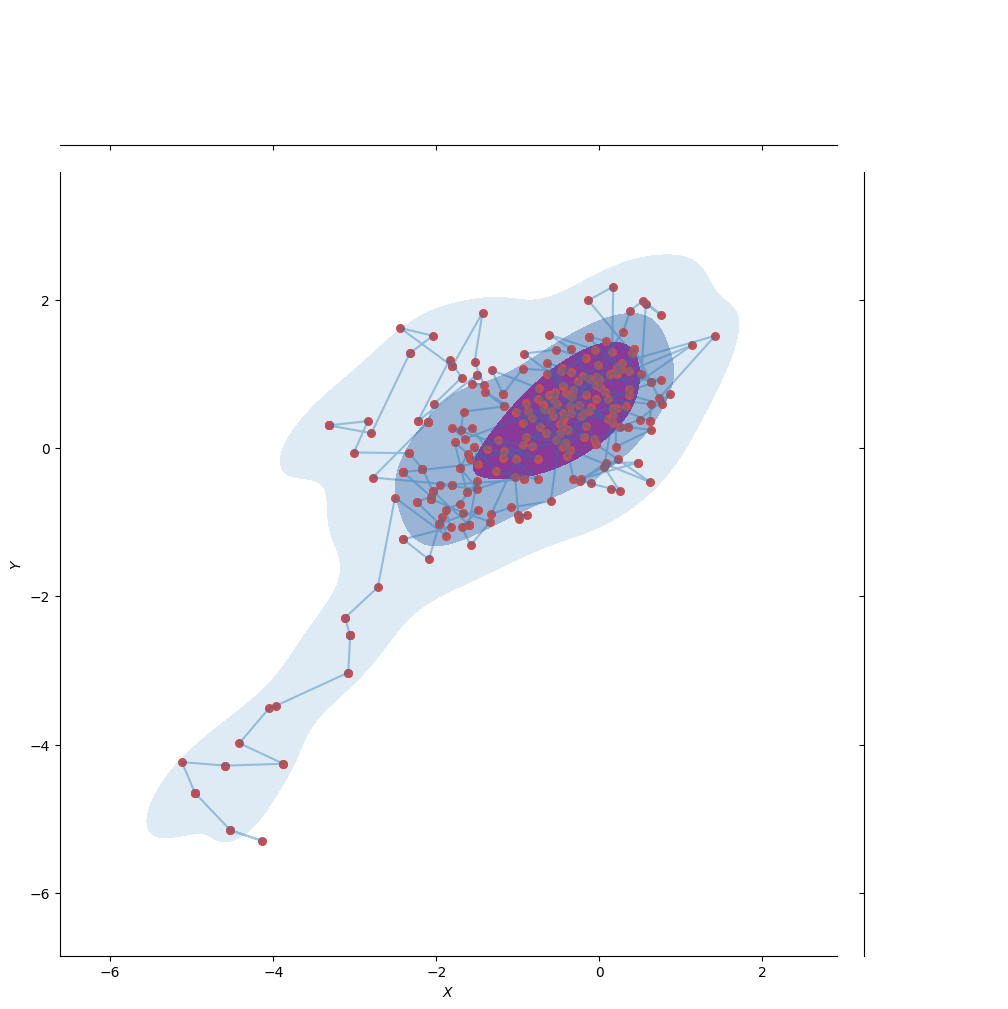

In [308]:
# generate the samples
samples = metropolis_hastings(ptarget, 300, -5, -5, 0.4)

# visualise
plot_dist(samples[:, 0], samples[:, 1])
plt.savefig('caminates.png')

## DISTRIBUCIÓN DE GRIEWANK

La distribución de Griewank esta dada por
$$
\frac{(x^2+y^2)}{4000} - cos(x)*cos(\frac{y}{\sqrt{2}}) +1
$$

In [293]:
def Griewank(X, Y):
    """
    Bivariate Gaussian distribution for equal shape *X*, *Y*.
    See `bivariate normal
    <http://mathworld.wolfram.com/BivariateNormalDistribution.html>`_
    at mathworld.
    """
    Xmu = X
    Ymu = Y
    f = (X**2+Y**2)/4000 - (np.cos(X))*(np.cos(Y/2**(1/2)))+1
    return f

In [294]:
def plot_dist(x,y):
    ''' plotting environment we frequently use to visualise the
    sampling algorithms.'''

    sns.set_style('white')
    plt.rcdefaults()

    # plot contour
    g = sns.JointGrid(x=x, y=y, height=10).plot_joint(sns.kdeplot, n_levels=4, cmap="BuPu", shade=True, shade_lowest=False)

    # add scatter plot of data
    g = g.plot_joint(plt.scatter, c="r", s=30, linewidth=1)
    plt.plot(x, y, linestyle='-', marker='', alpha=0.4, )

    # set axis labels
    g.set_axis_labels("$X$", "$Y$")

In [295]:
def traceplot(x):
    '''traceplot in the x-dimension with the cumulative mean (r)
    and the actual mean (--)'''
    sns.tsplot(x)
    l = list(accumulate(x))
    nl = [v/i for i, v in enumerate(l,1)]
    plt.plot(nl, 'r')
    plt.axhline(y=0.0, color='k', linestyle='--')
    plt.ylabel('x')
    plt.xlabel('Iteration')

In [296]:
def autocorrelation_plot(x, l):
    '''plots the autocorrelation of x to lag = l'''
    plt.acorr(x - np.mean(x), maxlags=l,  normed=True, usevlines=False);
    plt.xlim((0, 100))
    plt.ylabel('Autocorrelation')
    plt.xlabel('Lag')


In [297]:
# set mean and covariance for Q
mean = np.array([0, 1])
var = np.array([[1, .5], [.5, 1]])

Text(0.5, 0, '$\\pi(x,y)$')

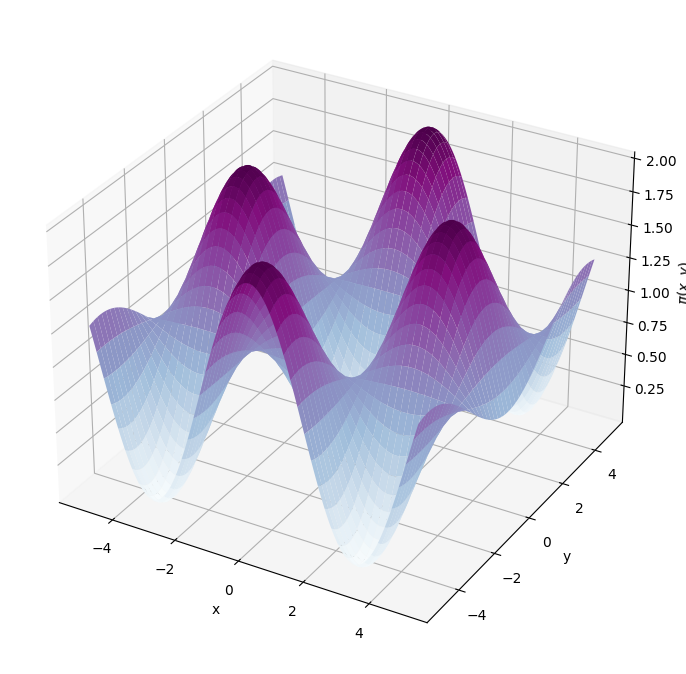

In [298]:
# create grid for 3D plot
x, y = np.linspace(-5, 5, 200), np.linspace(-5, 5, 200)
X,Y = np.meshgrid(x, y)

# generate bivariate normal
Z = Griewank(X,Y)

# plot surface in 3D
fig = plt.figure(figsize=(12,8.5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap= 'BuPu')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('$\pi(x,y)$')

### Definimos la 2D distribución objetivo:

In [299]:
def ptarget(x, y):
  x = x
  y = y
  return Griewank(x, y)

In [300]:
def metropolis_hastings(p, n, x0, y0, step):
    x = x0
    y = y0

    points = np.zeros((n, 2)) # Lista inicial de muestras, al momento, con puros ceros

    for i in range(n):

        # Proponemos nuevos valores para el estado actual mediante el muestreo Q(x',y' | x,y)
        x_star, y_star = np.array([x, y]) + np.random.normal(scale=step,size=2)

        # Condición de Metropolis-Hastings // en este paso de elimina la constante para cumplir la condicion de normalidad.
        if np.random.rand() < p(x_star, y_star) / p(x, y):
            x, y = x_star, y_star

        # Se actualiza la lista de muestras
        points[i] = np.array([x, y])

    return points

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)


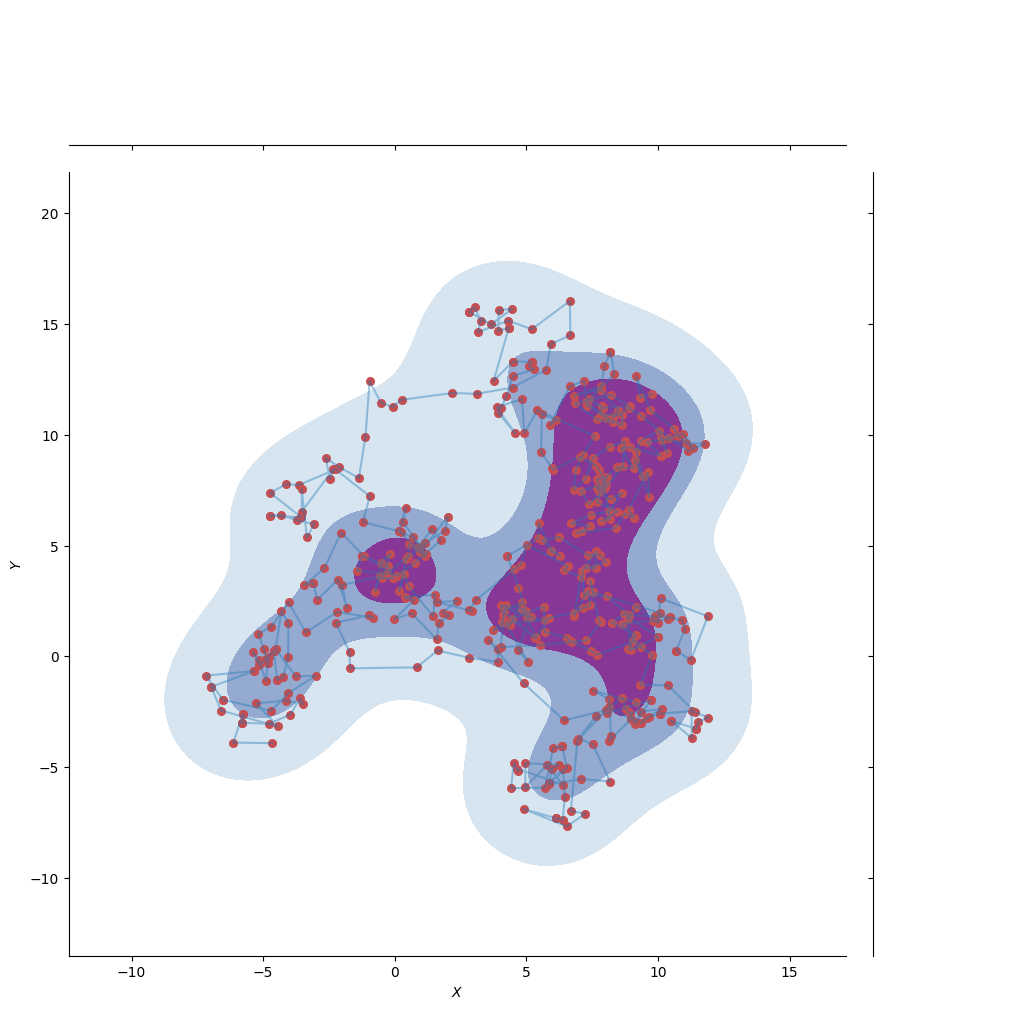

In [301]:
# generate the samples
samples1 = metropolis_hastings(ptarget, 500, -5, -5, 0.8)

# visualise
plot_dist(samples1[:, 0], samples1[:, 1])
plt.savefig('caminates.png')

1. Media

La media de la función de Griewank depende del dominio de x,y. En general, para funciones de este tipo, no se puede calcular una media explícita sin definir un rango específico para x,y. Sin embargo, si evaluamos la función en un intervalo específico, se podría calcular la media de los valores resultantes.

2. Desviación Estándar

Al igual que la media, la desviación estándar también requiere un conjunto específico de valores para calcularse. La desviación estándar mide la dispersión de los valores de la función respecto a la media.

In [292]:
#Calcula la media del metropolis hastings

mean_x = np.mean(samples1[:, 0]).round(3)
mean_y = np.mean(samples1[:, 1]).round(3)
std_dev_x = np.std(samples1[:, 0]).round(3)
std_dev_y = np.std(samples1[:, 1]).round(3)

print(f"Media de las muestras en X: {mean_x}")
print(f"Media de las muestras en Y: {mean_y}")
print(f"Desviación estándar en X: {std_dev_x}")
print(f"Desviación estándar en Y: {std_dev_y}")

Media de las muestras en X: 2.628
Media de las muestras en Y: 2.81
Desviación estándar en X: 2.921
Desviación estándar en Y: 3.188


Calcular la media y la varianza de esta distribución no es tan simple analiticamente, por lo que en estos casos, utilizamos las herramientas de la programación.

## DISTRIBUCIÓN BETA BIVARIADA




La función de densidad conjunta para una distribución beta bivariada tiene esta forma para dos variables aleatorias $X_1$ y $X_2$:

$$
f(x_1, x_2; \alpha_1, \alpha_2, \beta_1, \beta_2, \rho) = C \cdot x_1^{\alpha_1 - 1} x_2^{\alpha_2 - 1} (1 - x_1)^{\beta_1 - 1} (1 - x_2)^{\beta_2 - 1} \cdot (1 - \rho (1 - x_1 - x_2))
$$
donde:

- $\alpha_1, \alpha_2$ son parámetros de forma de $X_1$ y $X_2$,
-$ \beta_1, \beta_2$ son parámetros que controlan el decaimiento de $1 - x_1$ y $1 - x_2$,
- $\rho$ es el parámetro de correlación,
- \(C\) es una constante de normalización para garantizar que la integral de la función de densidad conjunta sea 1.

In [211]:
# Parámetros de la distribución beta bivariada
alpha1, alpha2 = 2, 5
beta1, beta2 = 3, 2
rho = 0.5  # Correlación (simplificado)

In [213]:
def beta_bivariate(x1, x2, alpha1, alpha2, beta1, beta2, rho):
    C = 1  # Constante de normalización (en distribuciones reales, se debe calcular correctamente)
    return C * (x1**(alpha1 - 1)) * ((1 - x1)**(beta1 - 1)) * (x2**(alpha2 - 1)) * ((1 - x2)**(beta2 - 1)) * (1 - rho * (1 - x1 - x2))

In [214]:
def plot_dist(x,y):
    ''' plotting environment we frequently use to visualise the
    sampling algorithms.'''

    sns.set_style('white')
    plt.rcdefaults()

    # plot contour
    g = sns.JointGrid(x=x, y=y, height=10).plot_joint(sns.kdeplot, n_levels=4, cmap="BuPu", shade=True, shade_lowest=False)

    # add scatter plot of data
    g = g.plot_joint(plt.scatter, c="r", s=30, linewidth=1)
    plt.plot(x, y, linestyle='-', marker='', alpha=0.4, )

    # set axis labels
    g.set_axis_labels("$X$", "$Y$")

In [215]:
def traceplot(x):
    '''traceplot in the x-dimension with the cumulative mean (r)
    and the actual mean (--)'''
    sns.tsplot(x)
    l = list(accumulate(x))
    nl = [v/i for i, v in enumerate(l,1)]
    plt.plot(nl, 'r')
    plt.axhline(y=0.0, color='k', linestyle='--')
    plt.ylabel('x')
    plt.xlabel('Iteration')

In [216]:
def autocorrelation_plot(x, l):
    '''plots the autocorrelation of x to lag = l'''
    plt.acorr(x - np.mean(x), maxlags=l,  normed=True, usevlines=False);
    plt.xlim((0, 100))
    plt.ylabel('Autocorrelation')
    plt.xlabel('Lag')


Text(0.5, 0, '$\\pi(x,y)$')

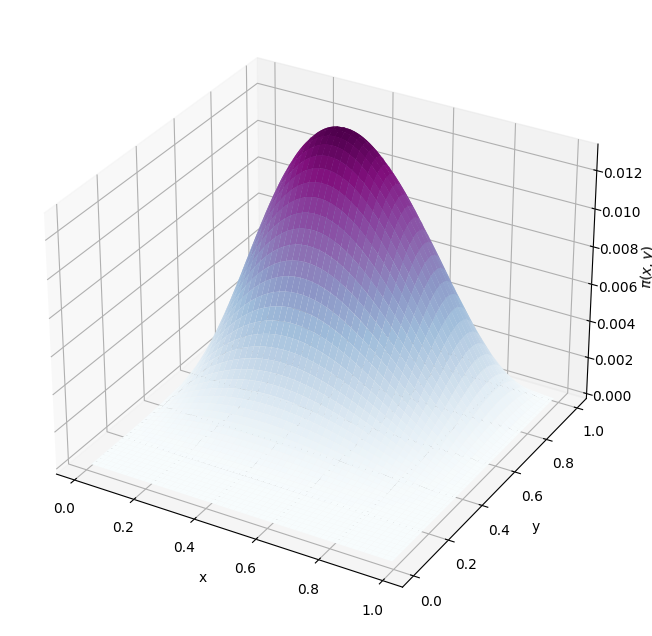

In [217]:
# create grid for 3D plot
x, y = np.linspace(0.01, 0.99, 100), np.linspace(0.01, 0.99, 100)
X,Y = np.meshgrid(x, y)
# generate bivariate normal
Z = beta_bivariate(X, Y, alpha1, alpha2, beta1, beta2, rho)
# plot surface in 3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap= 'BuPu')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('$\pi(x,y)$')

In [219]:
def ptarget(x, y):
# Parámetros de la distribución beta bivariada
  alpha1, alpha2 = 2, 5
  beta1, beta2 = 3, 2
  rho = 0.5  # Correlación (simplificado)
  C = 1  # Constante de normalización
  return C * (x**(alpha1 - 1)) * ((1 - x)**(beta1 - 1)) * (y**(alpha2 - 1)) * ((1 - y)**(beta2 - 1)) * (1 - rho * (1 - x - y))

In [222]:
# Algoritmo de Metropolis-Hastings
def metropolis_hastings(p, n, x0, y0, step):
    x = x0
    y = y0

    points = np.zeros((n, 2))  # Lista inicial de muestras, al momento, con puros ceros

    for i in range(n):
        # Proponemos nuevos valores para el estado actual mediante el muestreo Q(x',y' | x,y)
        x_star, y_star = np.array([x, y]) + np.random.normal(scale=step, size=2)

        # Aseguramos que las muestras propuestas estén dentro del dominio de la distribución Beta [0, 1]
        x_star = np.clip(x_star, 0, 1)
        y_star = np.clip(y_star, 0, 1)

        # Condición de Metropolis-Hastings
        if np.random.rand() < min(1, p(x_star, y_star) / p(x, y)):
            x, y = x_star, y_star

        # Se actualiza la lista de muestras
        points[i] = np.array([x, y])

    return points

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)


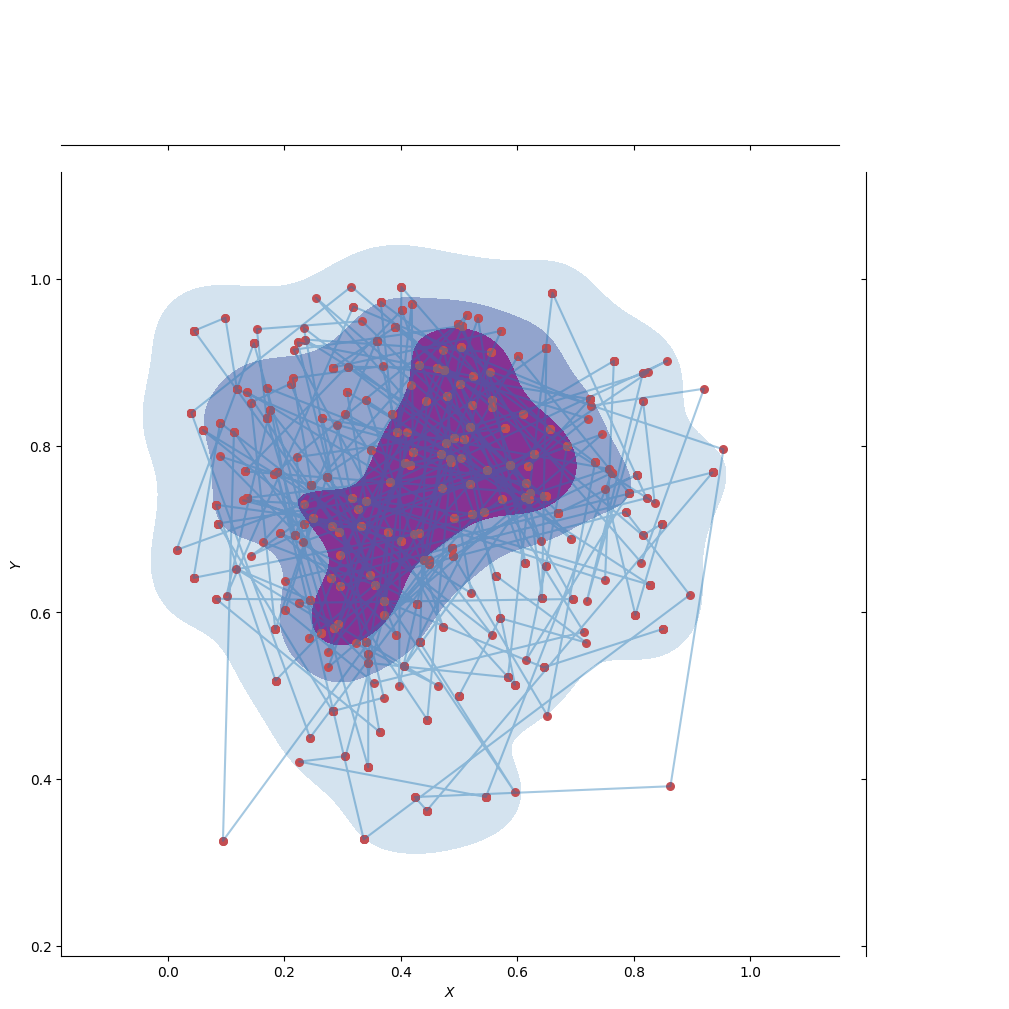

In [230]:
# generate the samples
samples2 = metropolis_hastings(ptarget, 1000, 0.5, 0.5, 0.4)
# visualise
plot_dist(samples2[:, 0], samples2[:, 1])
plt.savefig('caminates_exp.png')

**MEDIA Y DESVIACIÓN ESTÁNDAR SIMULADO**

In [245]:
#Calcula la media del metropolis hastings

mean_x = np.mean(samples2[:, 0]).round(3)
mean_y = np.mean(samples2[:, 1]).round(3)
std_dev_x = np.std(samples2[:, 0]).round(3)
std_dev_y = np.std(samples2[:, 1]).round(3)

print(f"Media de las muestras en X: {mean_x}")
print(f"Media de las muestras en Y: {mean_y}")
print(f"Desviación estándar en X: {std_dev_x}")
print(f"Desviación estándar en Y: {std_dev_y}")

Media de las muestras en X: 0.431
Media de las muestras en Y: 0.741
Desviación estándar en X: 0.208
Desviación estándar en Y: 0.145


**MEDIA Y DESVIACIÓN ESTÁNDAR (ANALITICAMENTE)**

Si las dos variables siguen distribuciones Beta independientes con parámetros $\alpha_1, \beta_1$ y $\alpha_2, \beta_2$, las medias y varianzas serían independientes y podrían calcularse de manera similar para cada variable.




*   Media de la primera variable
$$
\mu_1 = \frac{\alpha_1}{\alpha_1+\beta_1} = \frac{2}{2+3} = \frac{2}{5} = 0.4
$$

*   Media de la segunda variable
$$
\mu_1 = \frac{\alpha_2}{\alpha_2+\beta_2} = \frac{5}{5+2}= 5/7 \approx 0.7142
$$

*   Varianza de la primera variable
$$
\sigma^2_1 = \frac{\alpha_1\beta_1}{(\alpha_1+\beta_1)^2(\alpha_1+\beta_1+1)} = \frac{2*2}{(2+3)^2(2+3+1)} = 0.04 → \sigma_1 = \sqrt{0.04} = 0.2
$$
*   Varianza de la segunda variable
$$
\sigma^2_2 = \frac{\alpha_2\beta_2}{(\alpha_2+\beta_2)^2(\alpha_2+\beta_2+1)} = \frac{5*2}{(5+2)^2(5+2+1)} → \sigma_1 = \sqrt{0.02} \approx 0.15
$$

La media y la desviación estandar son muy cercanas calculados de manera analitica y por simulación. Lo cual es una ventaja, ya que simplifica el trabajo.

## DISTRIBUCIÓN EXPONENCIAL BIVARIADA

La función de distribución bivariada de una exponencial esta dada por la siguiente función

$$
f(x,y) = \lambda_1e^{-\lambda_1x}*\lambda_2e^{-\lambda_2x}
$$

Donde:



*   $\lambda_1$ y $ \lambda_2$
  son los parámetros de tasa de las distribuciones exponenciales para x e y.
*   $x \geq 0,   y\geq 0$



In [246]:
def Exp(X, Y,l1,l2):
  f = (l1*np.exp(-l1*X))*(l2*np.exp(-l2*Y))
  return f

In [247]:
def plot_dist(x,y):
    ''' plotting environment we frequently use to visualise the
    sampling algorithms.'''

    sns.set_style('white')
    plt.rcdefaults()

    # plot contour
    g = sns.JointGrid(x=x, y=y, height=10).plot_joint(sns.kdeplot, n_levels=4, cmap="BuPu", shade=True, shade_lowest=False)

    # add scatter plot of data
    g = g.plot_joint(plt.scatter, c="r", s=30, linewidth=1)
    plt.plot(x, y, linestyle='-', marker='', alpha=0.4, )

    # set axis labels
    g.set_axis_labels("$X$", "$Y$")

In [248]:
def traceplot(x):
    '''traceplot in the x-dimension with the cumulative mean (r)
    and the actual mean (--)'''
    sns.tsplot(x)
    l = list(accumulate(x))
    nl = [v/i for i, v in enumerate(l,1)]
    plt.plot(nl, 'r')
    plt.axhline(y=0.0, color='k', linestyle='--')
    plt.ylabel('x')
    plt.xlabel('Iteration')

In [249]:
def autocorrelation_plot(x, l):
    '''plots the autocorrelation of x to lag = l'''
    plt.acorr(x - np.mean(x), maxlags=l,  normed=True, usevlines=False);
    plt.xlim((0, 100))
    plt.ylabel('Autocorrelation')
    plt.xlabel('Lag')


Text(0.5, 0, '$\\pi(x,y)$')

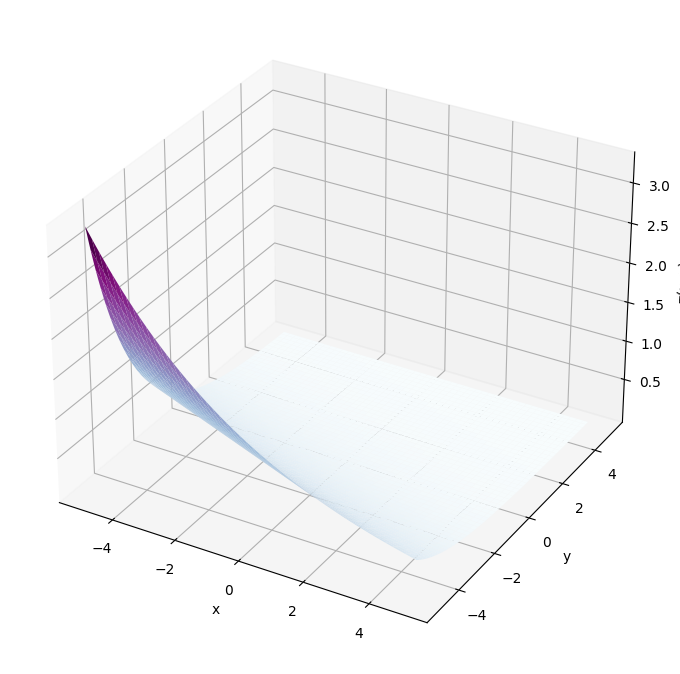

In [273]:
# create grid for 3D plot
x, y = np.linspace(-5, 5, 200), np.linspace(-5, 5, 200)
X,Y = np.meshgrid(x, y)
l1 = 0.2
l2 = 0.5
# generate bivariate normal
Z = Exp(X,Y, l1,l2)

# plot surface in 3D
fig = plt.figure(figsize=(12,8.5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap= 'BuPu')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('$\pi(x,y)$')

In [278]:
def ptarget(x, y):
  l1 = 0.2
  l2 = 0.5
  return (l1*np.exp(-l1*x))*(l2*np.exp(-l2*y))

In [279]:
def metropolis_hastings(p, n, x0, y0, step):
    x = x0
    y = y0

    points2 = np.zeros((n, 2))  # Lista inicial de muestras, al momento, con puros ceros

    for i in range(n):
        # Proponemos nuevos valores para el estado actual mediante el muestreo Q(x',y' | x,y)
        x_star, y_star = np.array([x, y]) + np.random.normal(scale=step, size=2)
        x_star = max(0, x_star)
        y_star = max(0, y_star)

        # Condición de Metropolis-Hastings
        if np.random.rand() < p(x_star, y_star) / p(x, y):
            x, y = x_star, y_star

        # Se actualiza la lista de muestras
        points2[i] = np.array([x, y])

    return points2

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)


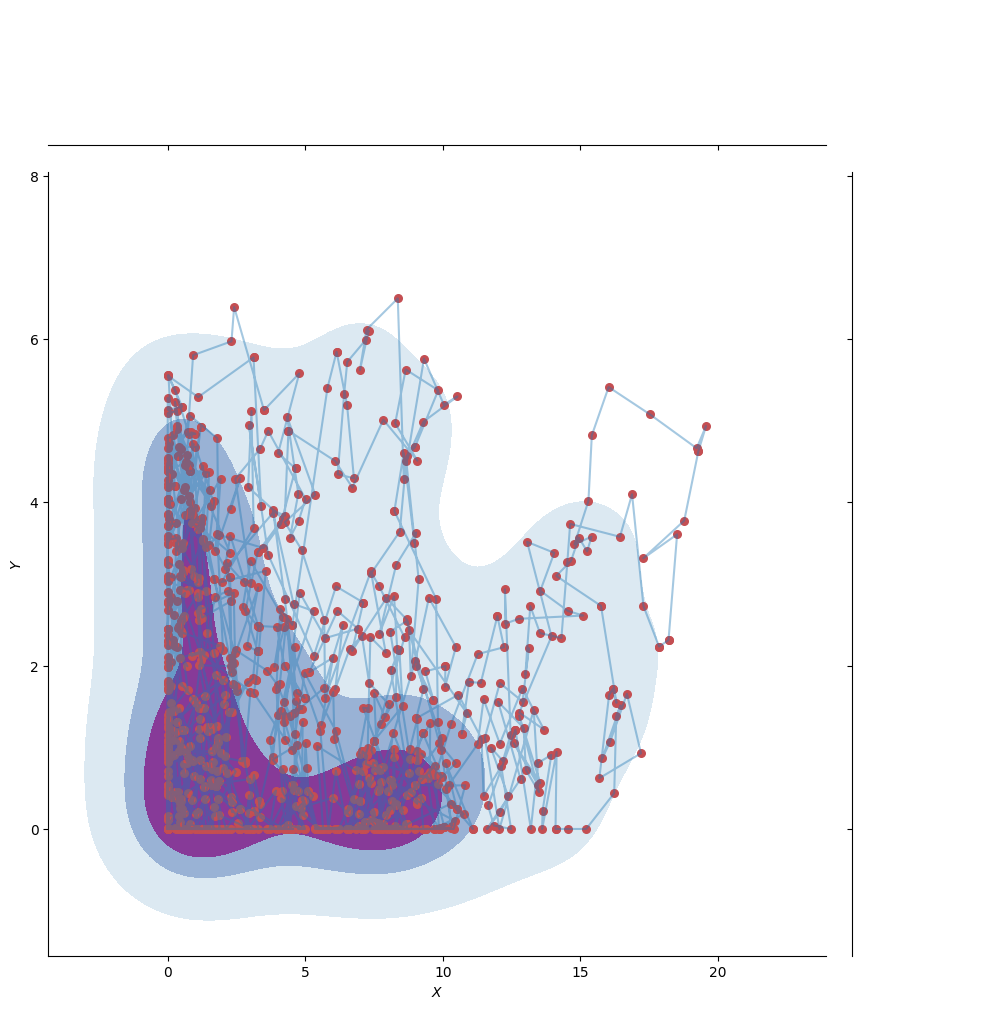

In [281]:
# generate the samples
samples3 = metropolis_hastings(ptarget, 1000, 0, 0, 0.8)

# visualise
plot_dist(samples3[:, 0], samples3[:, 1])
plt.savefig('caminates_exp.png')

Para la función exponencial bivariada la media se calcula de la siguiente manera:



*   Media de x
$$
E[X] = \frac{1}{\lambda_1} = 1/0.2 \approx 5
$$
*   Media de Y
$$
E[Y] = \frac{1}{\lambda_2} = 1/0.5 \approx 2
$$


*   Desviación estándar de X
$$
E[X] = \frac{1}{\lambda_1} = 1/0.2 \approx 5
$$
*   Desviación estándar de Y
$$
E[Y] = \frac{1}{\lambda_2} = 1/0.5 \approx 2
$$


In [282]:
mean_x = np.mean(samples3[:, 0]).round(3)
mean_y = np.mean(samples3[:, 1]).round(3)
std_dev_x = np.std(samples3[:, 0]).round(3)
std_dev_y = np.std(samples3[:, 1]).round(3)
print(f"Media de las muestras en X: {mean_x}")
print(f"Media de las muestras en Y: {mean_y}")
print(f"Desviación estándar en X: {std_dev_x}")
print(f"Desviación estándar en Y: {std_dev_y}")


Media de las muestras en X: 4.855
Media de las muestras en Y: 1.773
Desviación estándar en X: 4.579
Desviación estándar en Y: 1.635


Los valores de la media y la desviación estándar simulados son muy cercanos a los valores de la media y la desviación calculados analiticamente.